# Labolatorium nr 10

## Import bibliotek oraz ich konfiguracja

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

# Matplotlib settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

## Zadanie 1 - FFT

In [102]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [145]:
# Compare the two implementations
x = np.random.random(1024)
np.allclose(dft(x), np.fft.fft(x))

True

In [104]:
def idft(x):
    n = len(x)
    X = dft(x)
    return X.conj()/n

In [105]:
# Compare the two implementations
x = np.random.random(1024)
np.allclose(idft(x), np.fft.ifft(x))

True

In [99]:
def fft(x, n=None):
    if n is None:
        n = len(x)
        
    if n == 1:
        return x

    # Recursively compute DFT of even and odd parts
    X_even = fft(x[::2], n//2)
    X_odd = fft(x[1::2], n//2)

    # Compute DFT of original vector
    X = np.zeros(n, dtype=np.complex128)
    for k in range(n//2):
        p = X_even[k]
        q = np.exp(-2j*np.pi*k/n)*X_odd[k]
        X[k] = p + q
        X[k + n//2] = p - q

    return X

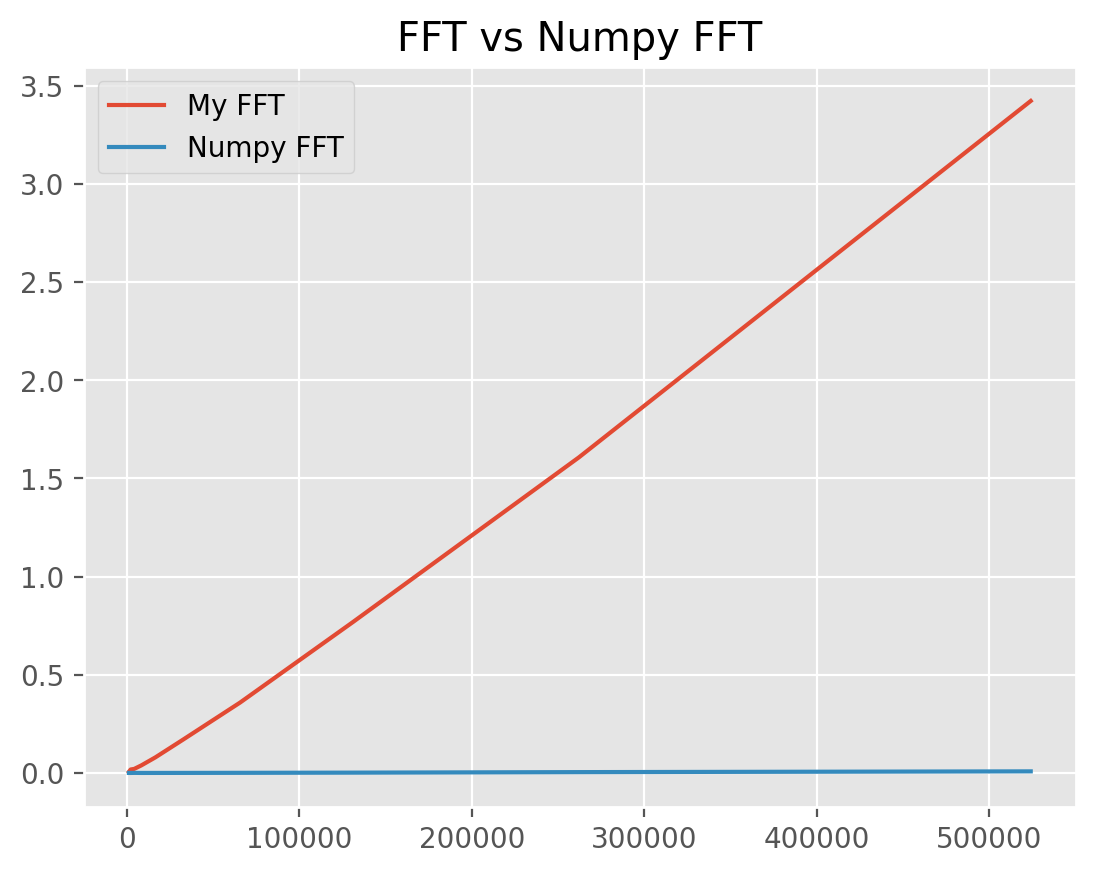

In [146]:
sample_sizes = [2**n for n in range(10, 20)]
result = []
result_np = []
for size in sample_sizes:
    x = np.random.random(size)

    start = time.time()
    X = fft(x)
    end = time.time()

    result.append(end - start)

    start = time.time()
    X_np = np.fft.fft(x)
    end = time.time()

    if not np.allclose(X, X_np):
        print("Something went wrong!")

    result_np.append(end - start)

plt.title("FFT vs Numpy FFT")
plt.plot(sample_sizes, result, label="My FFT")
plt.plot(sample_sizes, result_np, label="Numpy FFT")
plt.legend()
plt.show()

## Zadanie 2 - DFT w 1D

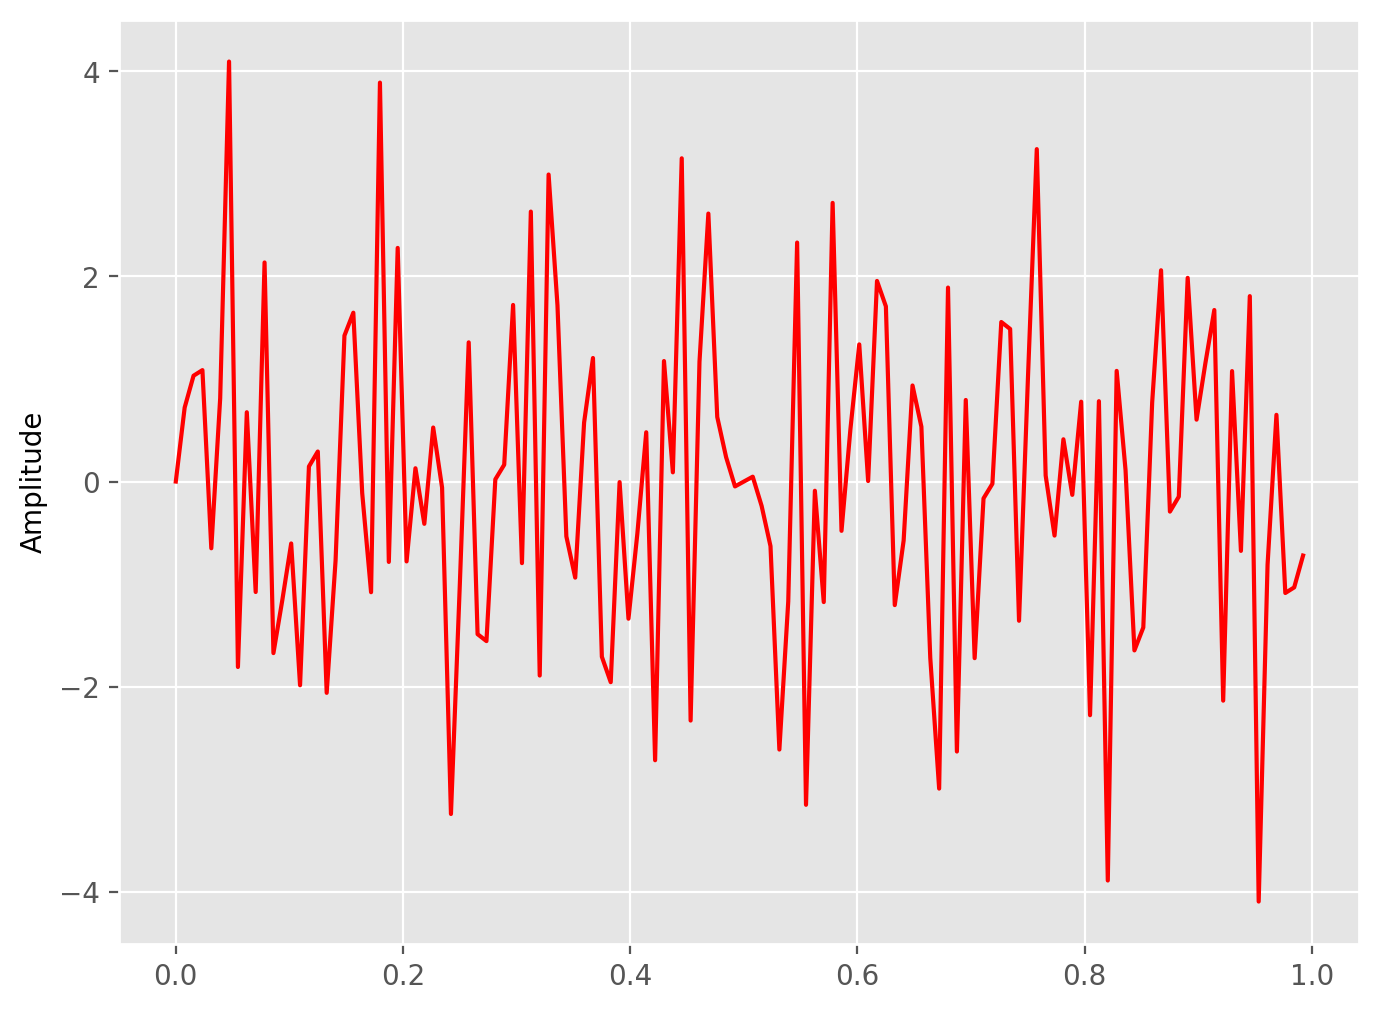

In [194]:
sr = 128
ts = 1.0/sr

t = np.arange(0,1,ts)

freq = np.random.randint(5, 10)
x = np.sin(2*np.pi*freq*t)

freq = np.random.randint(20, 30)
x += np.sin(2*np.pi*freq*t)

freq = np.random.randint(50, 100)
x += np.sin(2*np.pi*freq*t)

freq = np.random.randint(50, 100)
x += np.sin(2*np.pi*freq*t)

freq = np.random.randint(50, 100)
x += np.sin(2*np.pi*freq*t)

x_a = x.copy()

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.show()


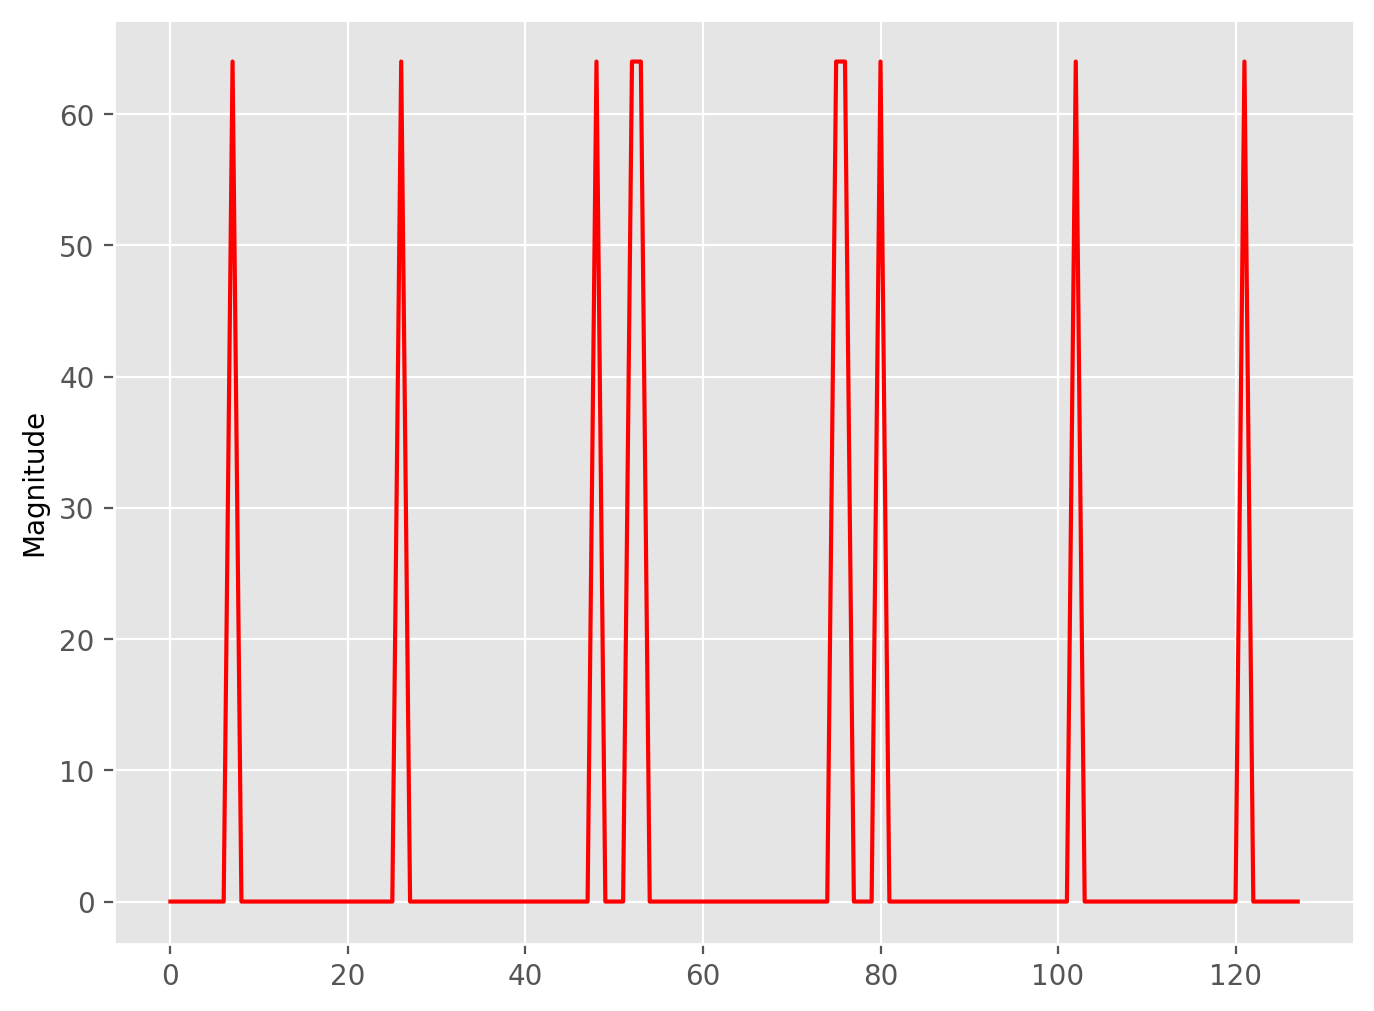

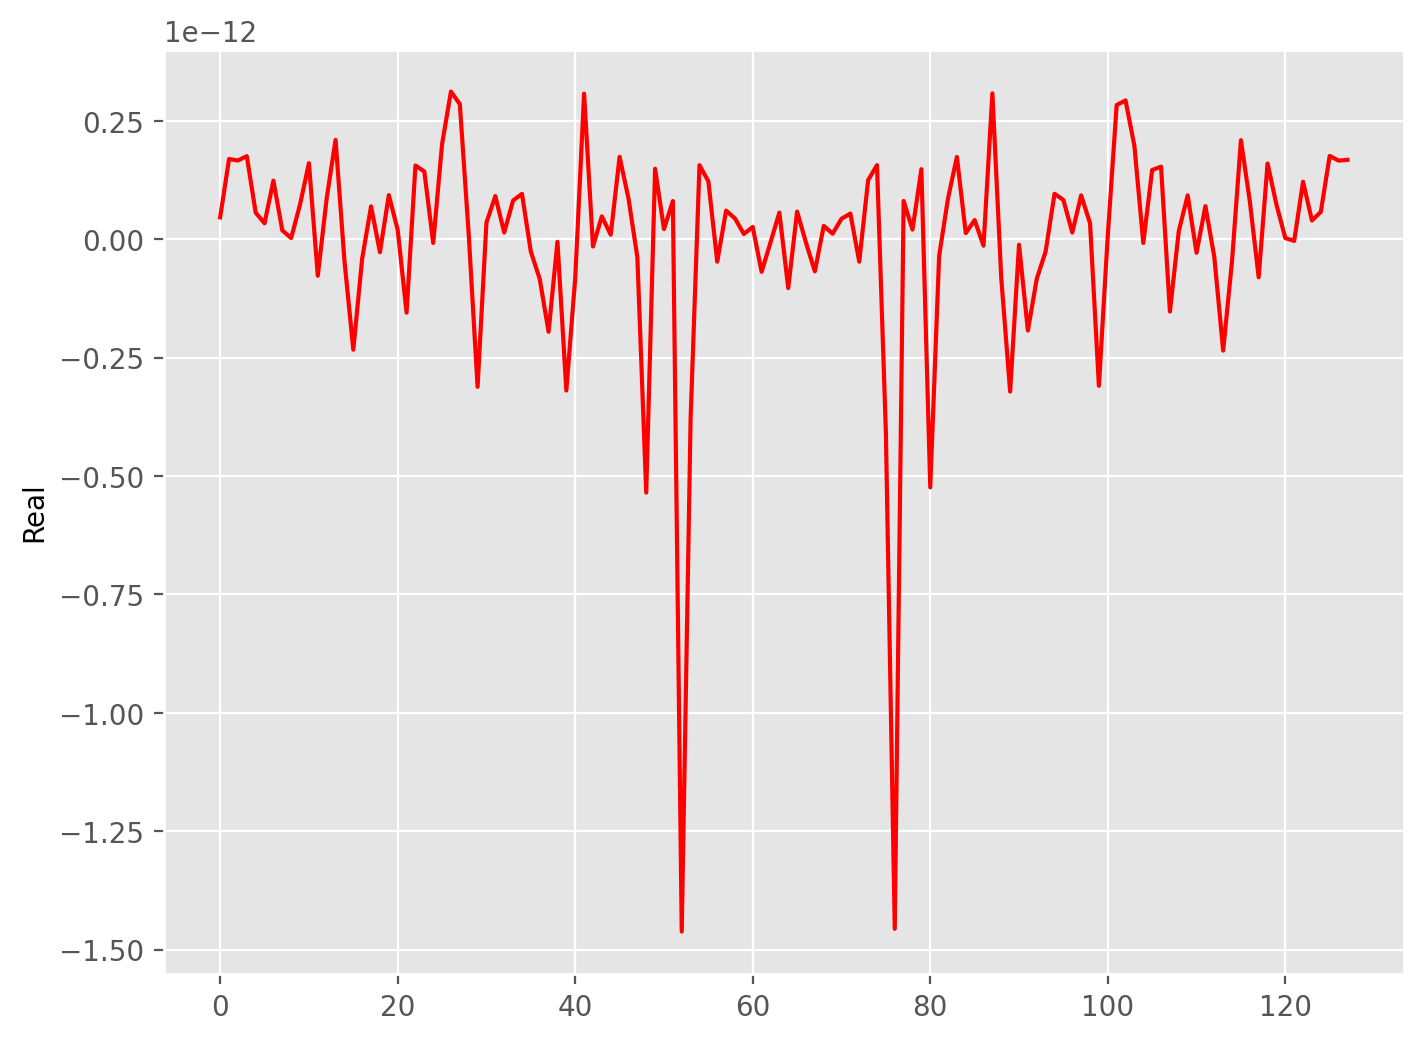

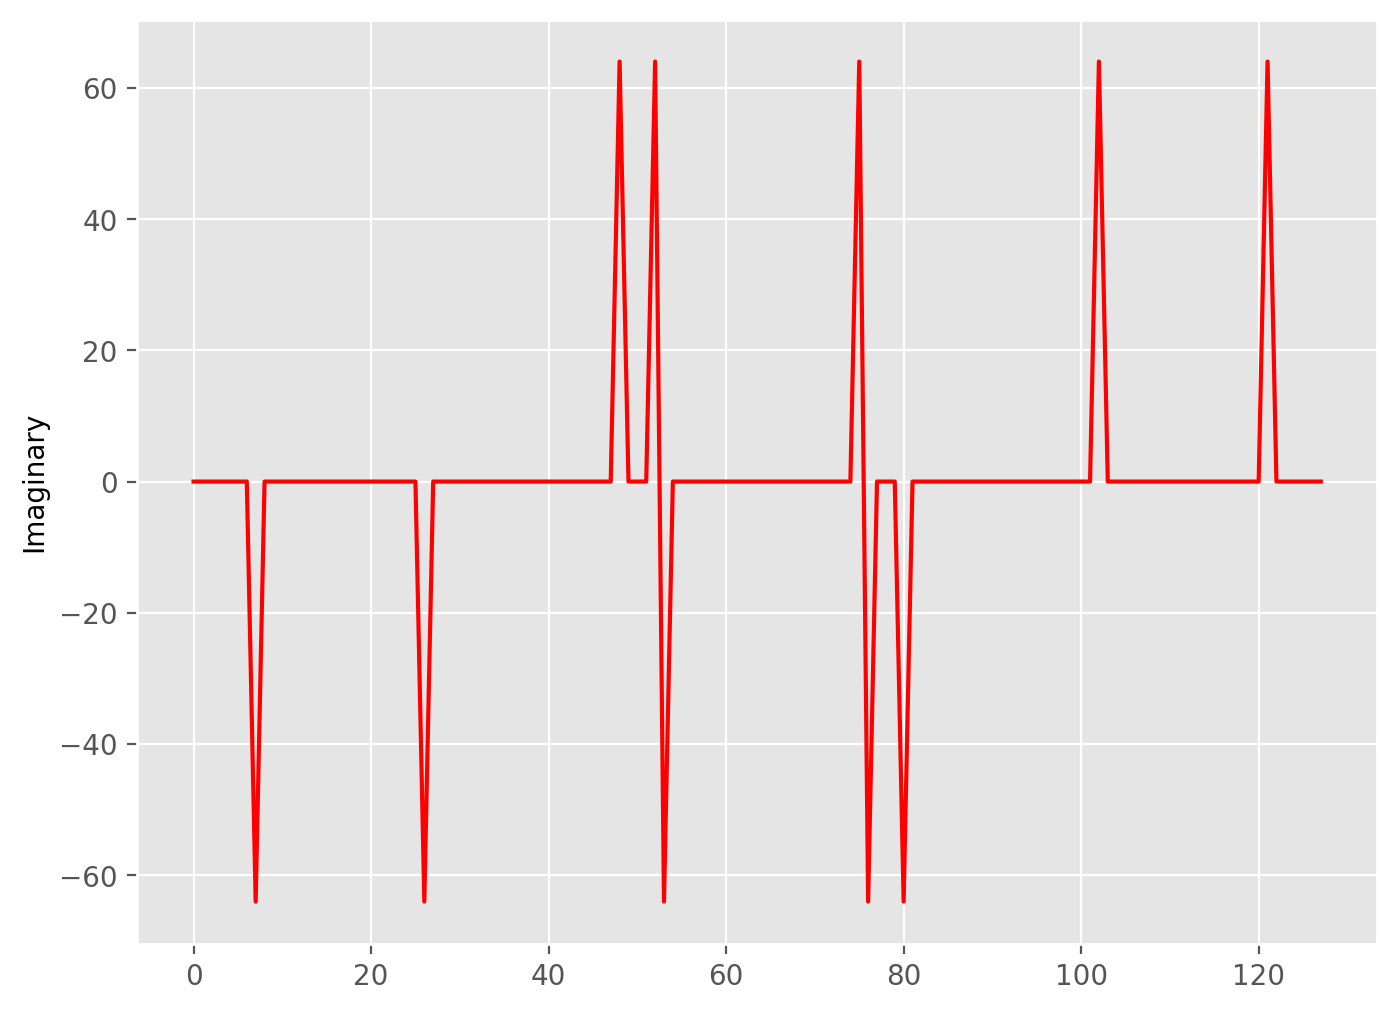

In [233]:
# Compute the DFT of the signal
X = fft(x_a)

# Plot the magnitude of the DFT
plt.figure(figsize = (8, 6))
plt.plot(np.abs(X), 'r')
plt.ylabel('Magnitude')
plt.show()

# Plot the real and imaginary numbers of the DFT on separate plots
plt.figure(figsize = (8, 6))
plt.plot(np.real(X), 'r')
plt.ylabel('Real')


plt.figure(figsize = (8, 6))
plt.plot(np.imag(X), 'r')
plt.ylabel('Imaginary')

plt.show()


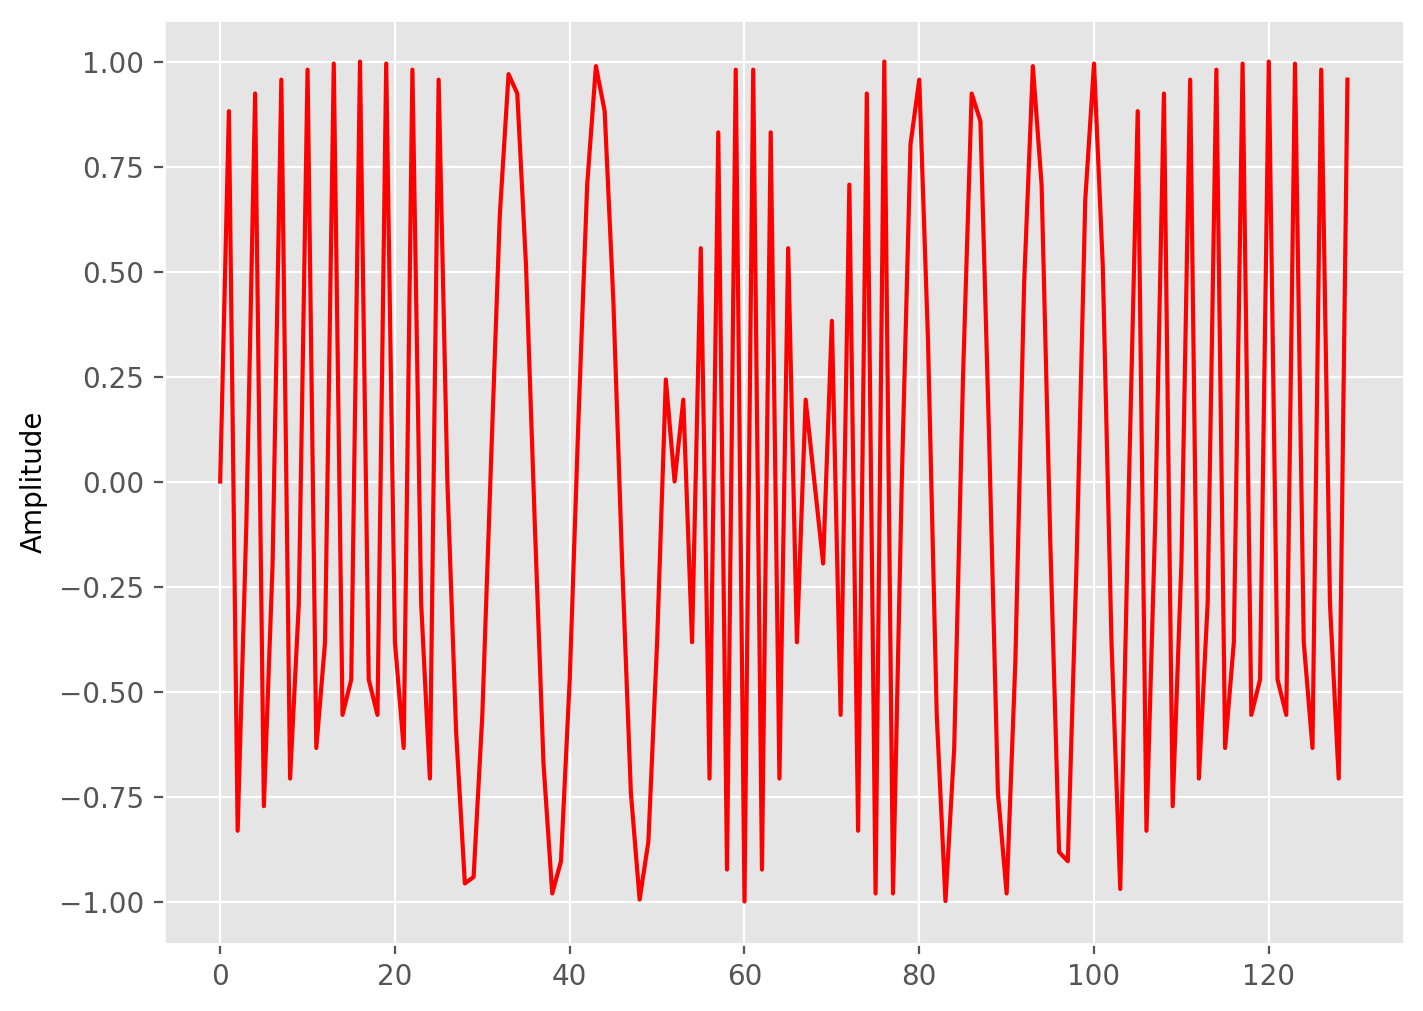

In [231]:
sr = 128
ts = 5.0/sr

t1 = np.arange(0,1,ts)
t2 = np.arange(0,1,ts)
t3 = np.arange(0,1,ts)
t4 = np.arange(0,1,ts)
t5 = np.arange(0,1,ts)

freq = np.random.randint(5, 100)
x1 = np.sin(2*np.pi*freq*t1)

freq =  np.random.randint(5, 100)
x2 = np.sin(2*np.pi*freq*t2)

freq =  np.random.randint(5, 100)
x3 = np.sin(2*np.pi*freq*t3)

freq =  np.random.randint(5, 100)
x4 = np.sin(2*np.pi*freq*t4)

freq =  np.random.randint(5, 100)
x5 = np.sin(2*np.pi*freq*t5)

x_b = np.concatenate([x1, x2, x3, x4, x5])

plt.figure(figsize = (8, 6))
plt.plot(x_b, 'r')
plt.ylabel('Amplitude')
plt.show()

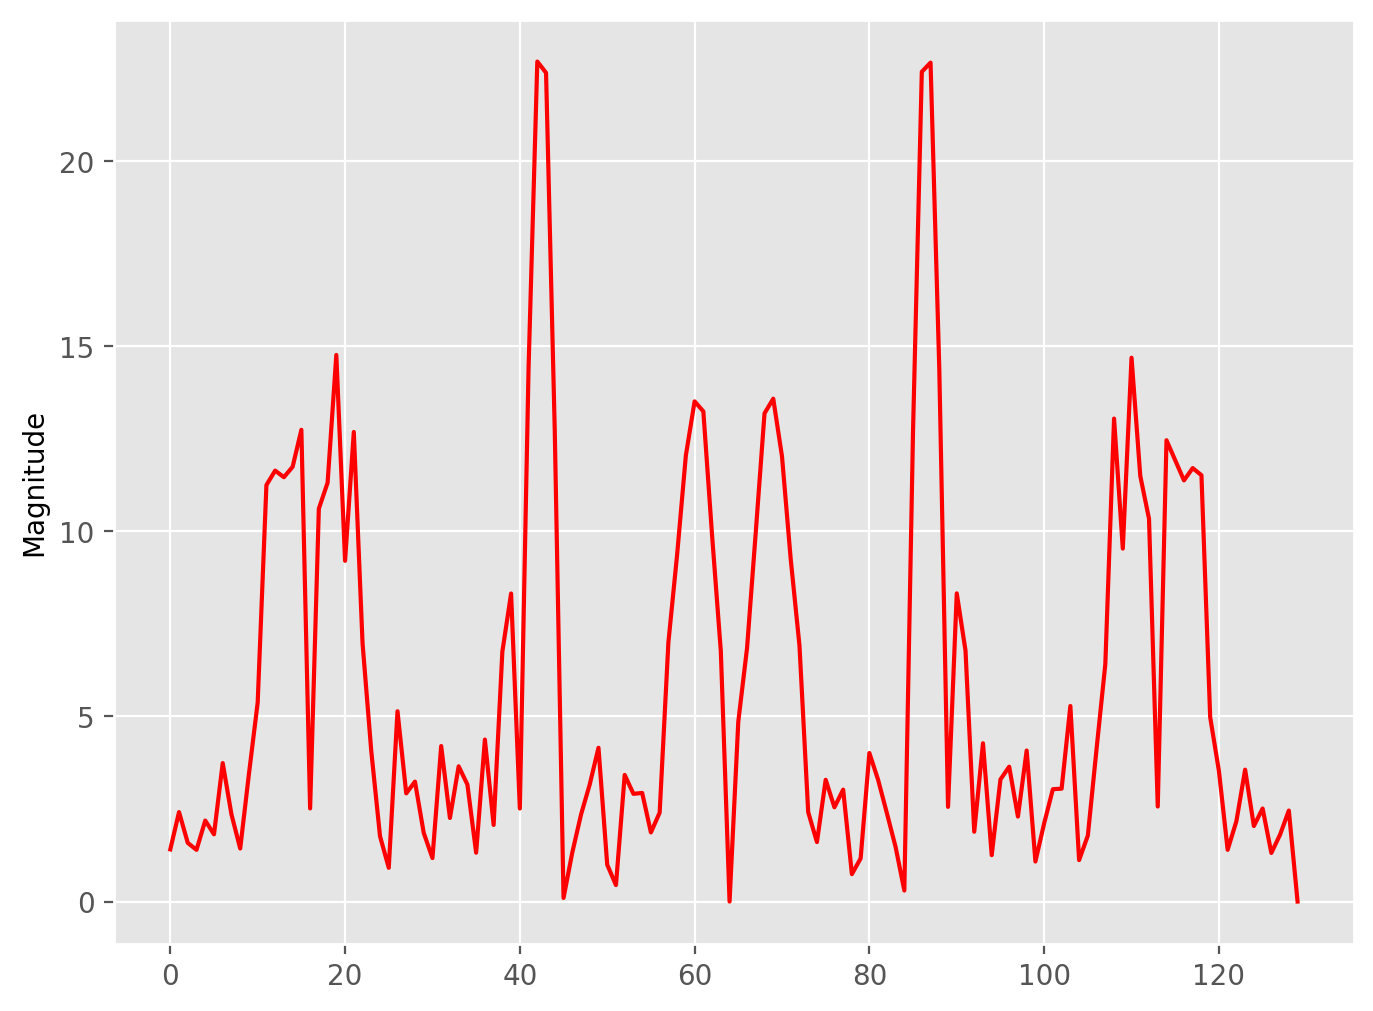

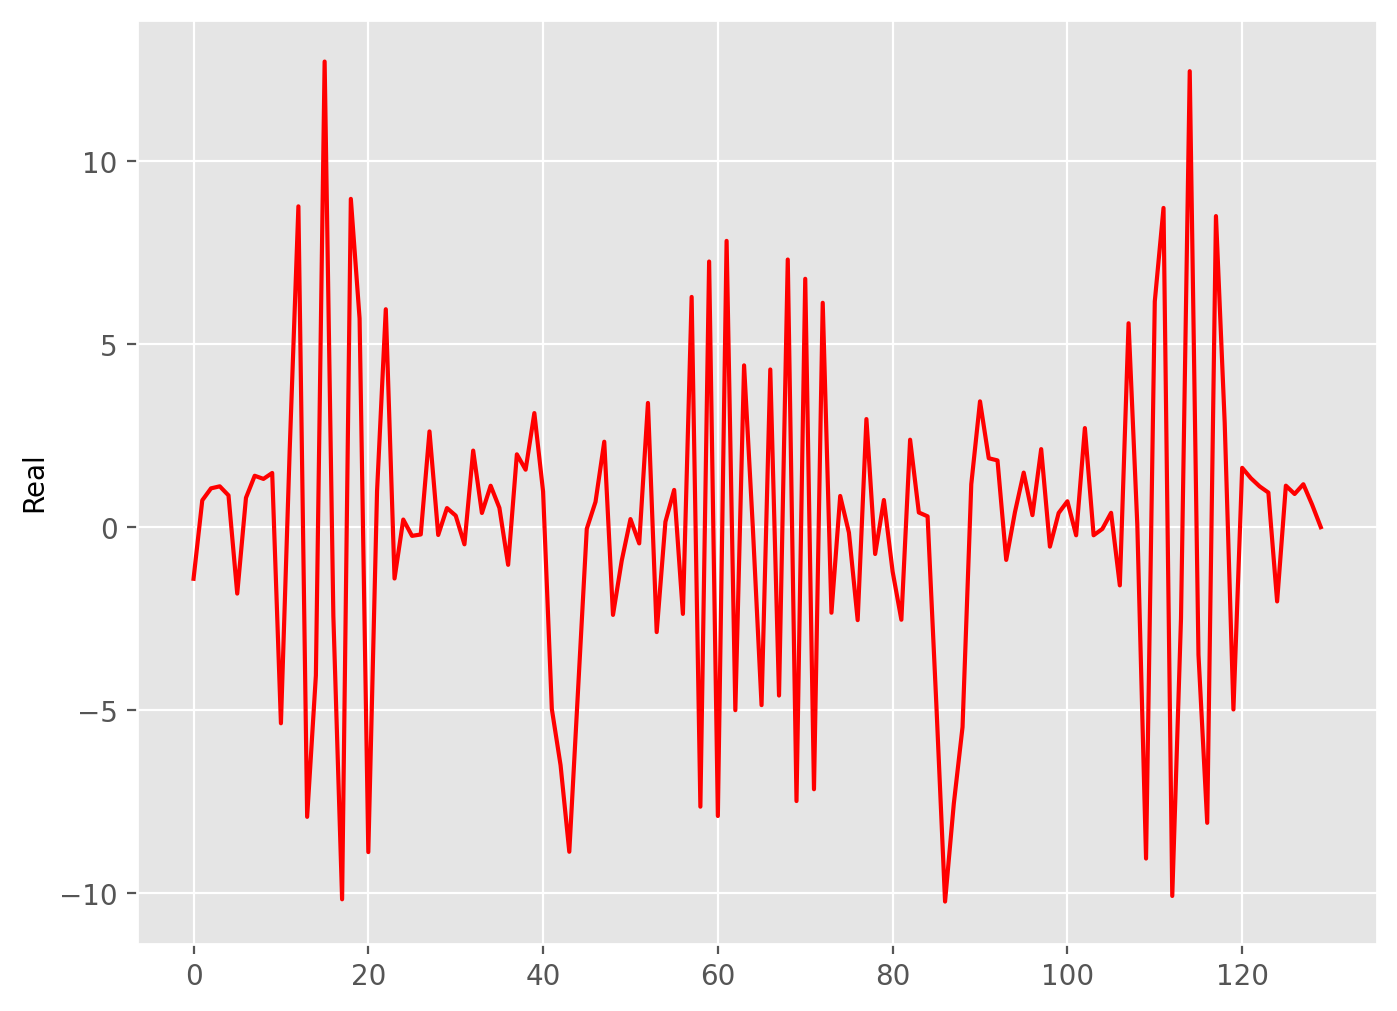

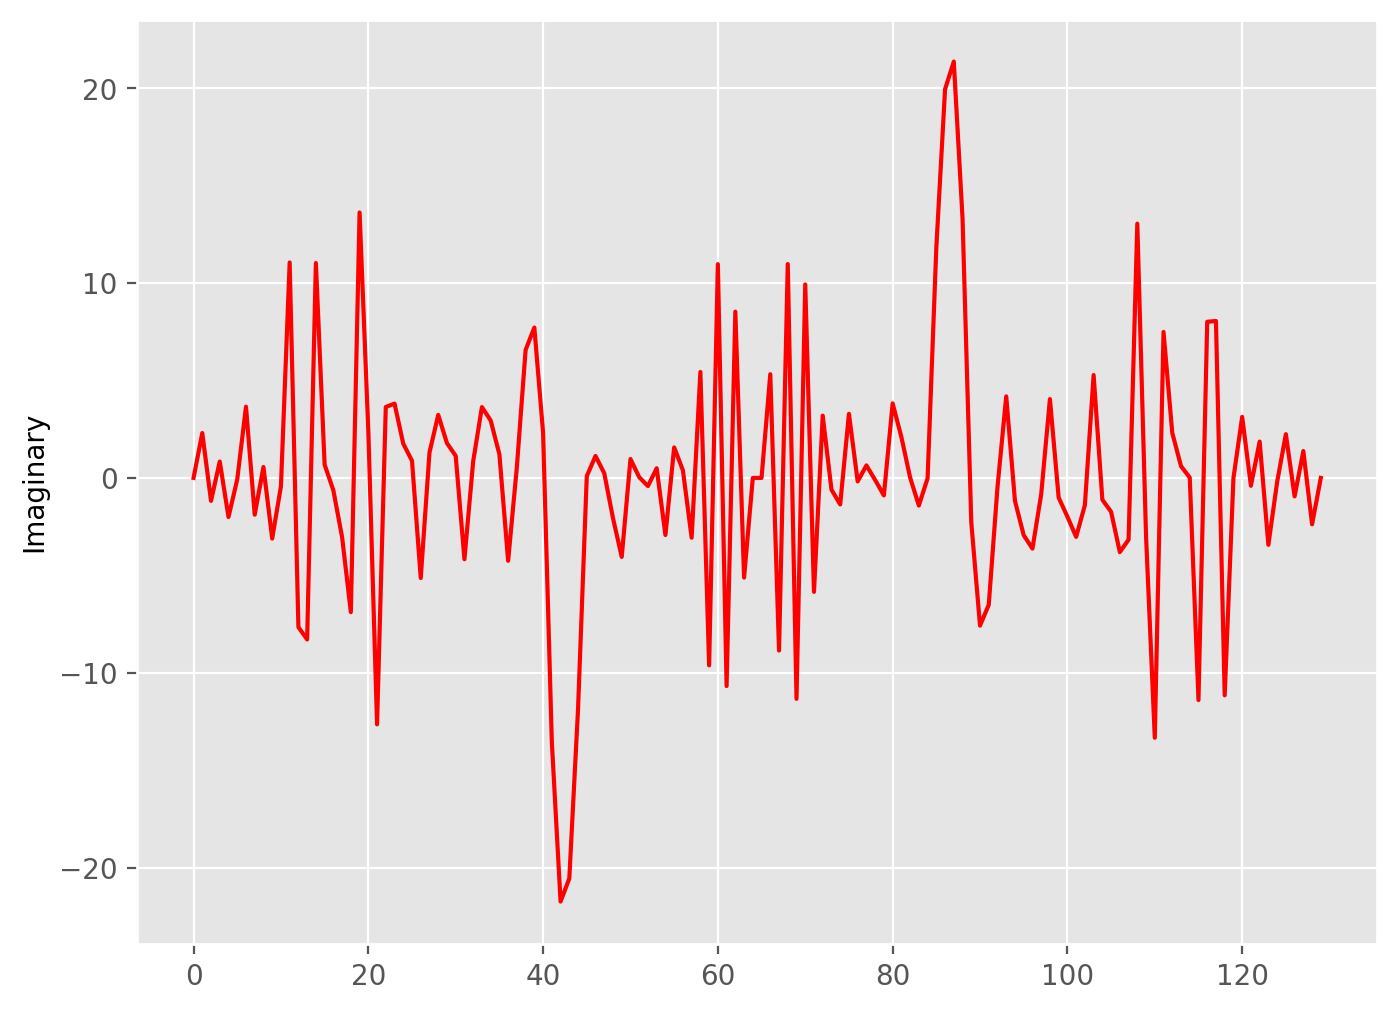

In [234]:
# Compute the DFT of the signal
X = fft(x_b)

# Plot the magnitude of the DFT
plt.figure(figsize = (8, 6))
plt.plot(np.abs(X), 'r')
plt.ylabel('Magnitude')
plt.show()

# Plot the real and imaginary numbers of the DFT on separate plots
plt.figure(figsize = (8, 6))
plt.plot(np.real(X), 'r')
plt.ylabel('Real')


plt.figure(figsize = (8, 6))
plt.plot(np.imag(X), 'r')
plt.ylabel('Imaginary')

plt.show()
